In [1]:
import pandas as pd

gen_dig = pd.read_csv("../dataset/generated_dialogue.csv")
gen_sum = pd.read_csv("../dataset/generated_summary.csv")

In [2]:
print(gen_dig.shape, gen_sum.shape)

(9966, 4) (9966, 4)


In [3]:
import random

idx = random.randint(0, gen_dig.shape[0])
print(idx)

gd_sample = gen_dig.iloc[idx]
gs_sample = gen_sum.iloc[idx]

print(f"{gd_sample['dialogue']}\n{gd_sample['summary']}\n")
print(f"{gs_sample['dialogue']}\n{gs_sample['summary']}")

1999
#사람1#: 에밀리, 너에겐 영화 계획이 있어?

#사람2#: 아니, 별로 없어. 너는?

#사람1#: 나쁜 공상과학 영화를 보러 가서 비웃어보는 건 어때?

#사람2#: 진짜? 그런 영화는 봤어?

#사람1#: 응, 몇 개 봤는데 정말 웃겼어. 너무 형편없어서 웃긴 거야.

#사람2#: 그럼 한 번 가볼까? 어떤 영화 볼까?

#사람1#: '우주 스톰프'라는 영화 어때? 그 영화는 정말 웃길 거야.

#사람2#: 좋아, 그럼 그 영화로 가자.

#사람1#: 영화관에서 만나자.

#사람2#: 좋아, 그럼 영화관에서 봐.
#Person1#은 에밀리에게 정말 나쁜 공상과학 영화를 보러 가서 비웃어보자고 한다.

#Person1# 그럼 에밀리, 이번 주말에 같이 영화 보고 싶어? #Person2# 그럼, 너는 무슨 영화를 보고 싶어? 지금 상영 중인 좋은 영화가 많지 않은 것 같아. #Person1# 음. . . 알았어! 우리 정말 나쁜 공상과학 영화를 보러 가서 극장 뒷자리에 앉아서 그걸 비웃어보는 건 어때? 어떻게 생각해? #Person2# 그게 좋은 계획이네. 약속이야!
#Person1#은 에밀리에게 이번 주말에 영화를 보자고 제안하고, 상영 중인 영화가 많지 않다는 이야기를 나눈다. #Person1#은 나쁜 공상과학 영화를 보며 비웃는 계획을 제안하고, #Person2#는 그 아이디어에 동의한다.


In [4]:
total_df = pd.concat([gen_dig, gen_sum])

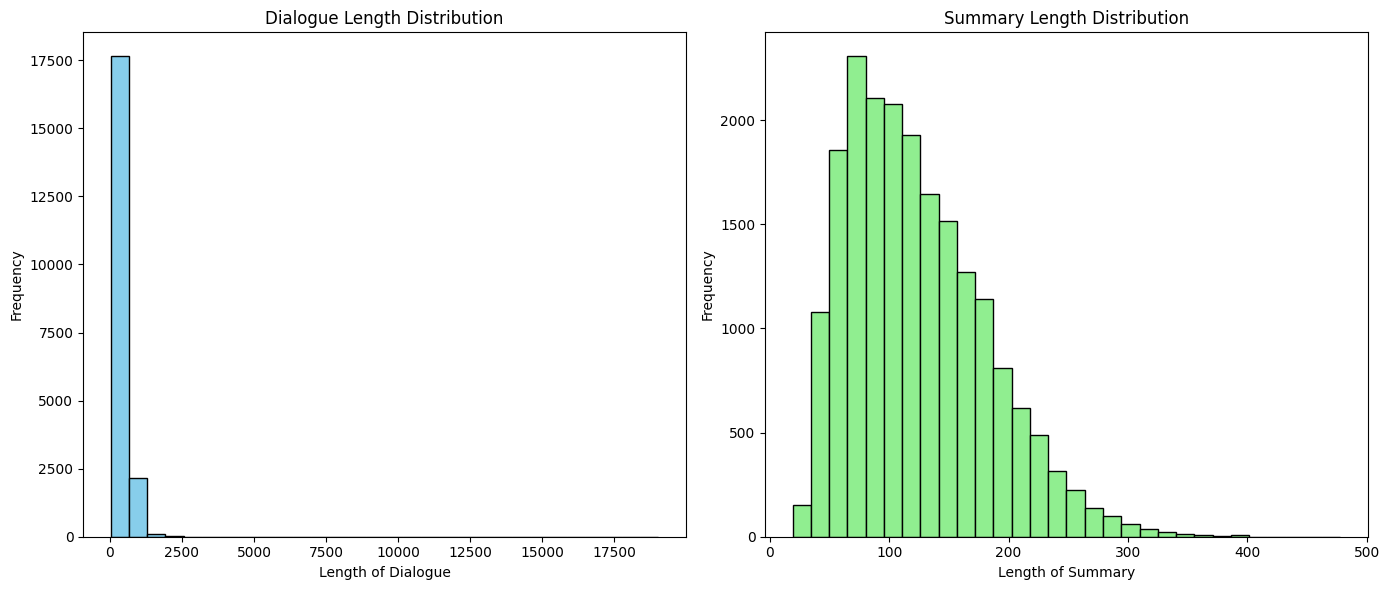

In [5]:
import matplotlib.pyplot as plt

total_df['dialogue_length'] = total_df['dialogue'].apply(len)
total_df['summary_length'] = total_df['summary'].apply(len)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(total_df['dialogue_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Dialogue Length Distribution')
plt.xlabel('Length of Dialogue')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(total_df['summary_length'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Summary Length Distribution')
plt.xlabel('Length of Summary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
import re

# 특수 문자열 패턴 찾기 함수
def find_special_strings(text):
    return re.findall(r'#\w+#', text)

total_df['dialogue_special_strings'] = total_df['dialogue'].apply(find_special_strings)
total_df['summary_special_strings'] = total_df['summary'].apply(find_special_strings)

unique_dialogue_strings = set([item for sublist in total_df['dialogue_special_strings'] for item in sublist])
unique_summary_strings = set([item for sublist in total_df['summary_special_strings'] for item in sublist])

print(unique_dialogue_strings)
print(unique_summary_strings)

{'#애슐린#', '#Person4#', '#빌#', '#잭#', '#마크#', '#구찌#', '#데이브#', '#Manager#', '#박사_그린#', '#DateOfBirth#', '#호텔주소#', '#캐서린#', '#스테파니#', '#경찰관#', '#PartnerName#', '#대화상대1#', '#로손#', '#루카스#', '#멜린다#', '#톰#', '#Location#', '#마이클#', '#리처드_클라크#', '#승객#', '#City#', '#베라#', '#피터#', '#수미#', '#아이리스#', '#첸#', '#제레미#', '#언어#', '#데이비드_왓슨#', '#로라#', '#리레이#', '#모리스_선생#', '#아이린씨#', '#브라이언#', '#Email#', '#짐#', '#사람4#', '#비비안#', '#줄리#', '#벤자민#', '#리즈#', '#CompanyName#', '#대니#', '#사이먼#', '#대학명#', '#Team2#', '#관리인#', '#레이#', '#카렌#', '#리씨#', '#제프#', '#린#', '#점원#', '#Person5#', '#제닌#', '#그린박사#', '#Person6#', '#지미#', '#캐롤린#', '#김수미#', '#Mary#', '#개인2#', '#밥#', '#바바라#', '#Name#', '#CityName#', '#릴리#', '#윌슨#', '#사람1#', '#호텔이름#', '#Target#', '#로브#', '#조지#', '#Person2_Daughter#', '#Person2_Son#', '#환자#', '#리사#', '#메리#', '#Tribe2#', '#마리안#', '#람보#', '#로즈#', '#데이빗#', '#소비아#', '#릭#', '#이전회사#', '#제니스#', '#친구#', '#다이애나#', '#로버트#', '#스티븐#', '#갓차#', '#헨리#', '#PhoneNumber#', '#팀#', '#클레어#', '#로이#', '#잭슨#', '#안나#', '#CarNum

In [7]:
dialogue_with_keyword = total_df[total_df['dialogue'].str.contains(r'#요약#', na=False)]

print(dialogue_with_keyword.shape)
print(dialogue_with_keyword)

(21, 8)
            fname                                           dialogue  \
245   train_11290  #Person1#: 신문에서 아파트를 찾고 있어, 혹시 어떤 걸 찾았어?\n#Per...   
342    train_5321  #Person1#: 안녕하세요 제니, 거실 가구 배치를 좀 변경하고 싶은데 어떻게 ...   
847      train_14  #Person1#: 요즘 어떤 음악을 듣고 있어요?\n#Person2#: 저는 댄스...   
2314   train_3265  #Person1#: 조안, 날씨가 진짜 최악이네.\n#Person2#: 응, 조지....   
2599   train_9661  #Person1#: 안녕하세요, 에릭.\n#Person2#: 안녕하세요.\n#Per...   
3188   train_9430  #Person1#: 톰, 오늘 밤 메리네 집에 가지 않을 거야?\n#Person2#...   
3577   train_1921  #Person1#: 야, 제발. 맥주 더 시켜줘.\n#Person2#: 미안해, 안...   
3892   train_8167  #Person1#: 와, 조던의 플레이를 보면 정말 대단해.\n#Person2#: ...   
3959   train_6348  #Person1#: 안녕하세요, 브라운 씨. 저희 식당에 오신 것을 환영합니다.\n...   
4197    train_561  #Person1#: 여자친구 생일 선물로 뭘 사면 좋을까?\n#Person2#: 음...   
4732   train_6182  #Person1#: 안녕하세요. 다음 달에 운동 수업이 시작될 예정이에요.\n#Pe...   
5329  train_10739  #Person1#: 어이쿠, 엘리베이터를 잘못 내렸네요.\n#Person2#: 아,...   
5524   train_7658  #Person1#: 오늘 연극은 어땠어?\n#Person2#: 솔직

In [8]:
print(dialogue_with_keyword.iloc[0]["dialogue"])
print(dialogue_with_keyword.iloc[0]["summary"])

#Person1#: 신문에서 아파트를 찾고 있어, 혹시 어떤 걸 찾았어?
#Person2#: 응, 침실이 두 개 있는 아파트를 찾았어. 보러 가보는 게 어때?
#Person1#: 좋아, 어디야?
#Person2#: 시내 중심가에서 멀지 않은 곳에 있어.
#Person1#: 좋아, 시간 있어?
#Person2#: 응, 시간이 있어.
#Person1#: 그럼 보러 가자.
#Person2#: 그래, 가자.

#요약#
#Person1#와 #Person2#는 신문에서 침실이 두 개인 아파트를 찾고 있다. 그들은 적합한 것을 찾아서 보러 가기로 계획한다.
#Person1#와 #Person2#는 신문에서 침실이 두 개인 아파트를 찾고 있다. 적합한 것을 찾아서 보러 가기로 계획한다.


In [9]:
print(dialogue_with_keyword.iloc[-1]["dialogue"])
print(dialogue_with_keyword.iloc[-1]["summary"])

#Person1#: 졸업 후 계획은 어떻게 되세요?
#Person2#: 저는 졸업 후 여행을 좀 다니고 싶어요. 그리고 나서 일자리를 구할 생각이죠.
#Person1#: 멋지네요. 그런데 졸업까지 남은 학기는 어떻게 되나요?
#Person2#: 저는 이미 졸업했어요.
#Person1#: 와, 축하드립니다! 그럼 다음에 어디로 여행 가실 계획이신가요?
#Person2#: 아직 정확히 정하지 않았어요. 여러 곳을 둘러보고 결정할 거예요.
#Person1#: 저도 같이 여행 가고 싶네요. 졸업까지 남은 학기가 어떻게 되세요?
#Person2#: 저는 아직 3학기가 남았어요.
#Person1#: 아직 시간이 많이 남았네요.
#Person2#: 네, 시간이 많아요. 그래서 여행을 먼저 가고 싶어요.
#Person1#: 졸업 후에는 어떤 일을 하고 싶으세요?
#Person2#: 저는 항상 선생님이 되고 싶었어요. 영어 부서에서 일하고 싶어요.
#Person1#: 선생님이 되려면 어떤 자격이 필요한가요?
#Person2#: 교육학 학위를 취득해야 하고, 교사 자격 시험도 통과해야 해요.
#Person1#: 선생님, 정말 대단하시네요. 여행에서 돌아오시면 꼭 연락해주세요.
#Person2#: 네, 당연히 연락드릴게요.

#요약#: 프랭크는 졸업 후 여행을 한 뒤 일자리를 구할 계획이고, 수는 졸업까지 아직 3학기가 남았다.
프랭크는 졸업 후에 여행을 한 뒤 일자리를 구할 계획이고, 수는 졸업까지 아직 3학기가 남았다.


In [10]:
def remove_dialogue_header(text):
    return text.replace("#대화#:\n", "")

total_df['dialogue'] = total_df['dialogue'].apply(remove_dialogue_header)
print(total_df['dialogue'].iloc[0])

#Person1#: 안녕하세요, 잭입니다.
#Person2#: 안녕하세요, 로즈입니다. 이번 토요일 저녁 식사에 초대하고 싶어요.
#Person1#: 좋아요, 로즈. 함께 식사하는 건 좋은 생각이에요. 어디에 모임이 있을까요?
#Person2#: 제 집에서 저녁 식사를 할 거예요. 당신은 제가 요리하는 걸 본 적이 없으니까, 기대해도 좋아요.
#Person1#: 제가 요리하는 걸 본 적이 없으니까, 기대해도 좋아요. 저는 음식을 좋아해서 당신의 요리를 맛보고 싶어요.
#Person2#: 감사합니다, 잭. 당신은 항상 저를 기분 좋게 만들어줘요.
#Person1#: 그럼 토요일에 봐요, 로즈.
#Person2#: 안녕히 계세요, 잭. 토요일에 봐요.


In [11]:
def remove_dialogue_header(text):
    return re.sub(r'#대화#:\s*', '', text)

total_df['dialogue'] = total_df['dialogue'].apply(remove_dialogue_header)

In [12]:
def remove_summary(text):
    return re.sub(r'#요약#:.*', '', text, flags=re.DOTALL)

total_df['dialogue'] = total_df['dialogue'].apply(remove_summary)

In [13]:
def remove_summary_with_newline(text):
    return re.sub(r'#요약#.*(\n.*)*', '', text, flags=re.DOTALL)

total_df['dialogue'] = total_df['dialogue'].apply(remove_summary_with_newline)

In [14]:
dialogue_with_keyword = total_df[total_df['dialogue'].str.contains(r'#레슬리#', na=False)]

print(dialogue_with_keyword.shape)
print(dialogue_with_keyword)

(1, 8)
            fname                                           dialogue  \
3559  train_12410  레슬리: #레슬리#: 마틴, 당신의 패키지가 손상되어서 도착했어요.\n마틴: #마틴...   

                                             summary    topic  \
3559  레슬리가 마틴에게 그의 패키지가 손상되었다고 알립니다. 마틴은 거기에 갈 것입니다.  손상된 패키지   

      dialogue_length  summary_length  \
3559              260              46   

                               dialogue_special_strings  \
3559  [#레슬리#, #마틴#, #레슬리#, #마틴#, #레슬리#, #마틴#, #레슬리#,...   

     summary_special_strings  
3559                      []  


In [15]:
print(dialogue_with_keyword.iloc[0]["dialogue"])
print(dialogue_with_keyword.iloc[0]["summary"])

레슬리: #레슬리#: 마틴, 당신의 패키지가 손상되어서 도착했어요.
마틴: #마틴#: 정말요? 알겠습니다. 제가 거기로 가서 확인하겠습니다.
레슬리: #레슬리#: 네, 그렇게 해주시면 감사하겠습니다.
마틴: #마틴#: 감사합니다, 레슬리.

레슬리: #레슬리#: 마틴, 당신의 택배가 손상되어서 도착했어요.
마틴: #마틴#: 정말요? 알겠습니다. 제가 확인하러 가겠습니다.
레슬리: #레슬리#: 네, 그렇게 해주시면 좋겠어요.
마틴: #마틴#: 감사합니다, 레슬리.
레슬리가 마틴에게 그의 패키지가 손상되었다고 알립니다. 마틴은 거기에 갈 것입니다.


In [16]:
def replace_names(text):
    # #한글사람이름#: 패턴 제거
    text = re.sub(r'#\w+#:', '', text)
    
    # 한글사람이름: 패턴을 #Person1#, #Person2#으로 대체
    person_names = list(set(re.findall(r'(\w+):', text)))  # 대화에 등장하는 사람 이름 찾기
    person_map = {name: f"#Person{i+1}#" for i, name in enumerate(person_names)}  # 이름을 #Person1#, #Person2#로 매핑
    
    # 대화에 등장하는 이름을 매핑된 값으로 대체
    for name, person in person_map.items():
        text = re.sub(rf'\b{name}:', f'{person}:', text)
    
    return text

total_df['dialogue'] = total_df['dialogue'].apply(replace_names)

In [17]:
dialogue_with_keyword = total_df[total_df['dialogue'].str.contains(r'#전공명#', na=False)]
print(dialogue_with_keyword)

print(dialogue_with_keyword.iloc[0]["dialogue"])
print(dialogue_with_keyword.iloc[0]["summary"])

            fname                                           dialogue  \
3289  train_10461   안녕하세요, #Person2#님.\n 안녕하세요.\n 대학 생활은 어땠나요?\n ...   

                                                summary  topic  \
3289  #Person2#는 #Person1#에게 #Person2#의 대학, 학위, 전공에 ...  직업 찾기   

      dialogue_length  summary_length  \
3289              419             110   

                               dialogue_special_strings  \
3289  [#Person1#, #Person2#, #Person2#, #Person1#, #...   

                           summary_special_strings  
3289  [#Person2#, #Person1#, #Person2#, #Person2#]  
 안녕하세요, #Person2#님.
 안녕하세요.
 대학 생활은 어땠나요?
 대학은 #대학명#에서 다녔습니다. 학위는 #학위명#이고 전공은 #전공명#입니다. 대학 생활 동안 많은 것을 배우고, 특히 #전공명#에 대한 깊은 이해를 갖게 되었습니다.
 정말 흥미로워 보입니다. 대학에서 배운 것을 업무에 어떻게 적용할 수 있을까요?
 대학에서 얻은 지식과 기술은 업무에 큰 도움이 될 것입니다. 예를 들어, #전공명# 전공자로서 데이터 분석과 문제 해결 능력을 갖추었으며, 이를 통해 조직의 문제를 해결하고 효율적인 업무 수행을 할 수 있습니다.
 그렇군요. #Person2#님의 대학 생활과 전공에 대해 알려주셔서 감사합니다.
#Person2#는 #Person1#에게 #Person2#의 대학, 학위, 전공에 대해 말합니다. #Person2#

In [18]:
total_df = total_df[~total_df['dialogue'].str.contains(r'#전공명#', na=False)]

In [19]:
def replace_and_remove_patterns(text):
    if not isinstance(text, str):
        return text
    
    # 대체 규칙
    replacements = {
        r'#Person2_Son#': 'Person2',
        r'#Person2_Daughter#': 'Person2',
        r'#Person2_Wife#': 'Person2',
        r'#사람2#': 'Person2',
        r'#사람4#': 'Person4',
        r'#사람3#': 'Person3',
        r'#사람1#': 'Person1'
    }

    # 삭제할 패턴 리스트
    delete_patterns = [
        r'#가수#',
        r'#Team2#',
        r'#Tribe1#',
        r'#목적지#',
        r'#리레이#',
        r'#언어#',
        r'#운전자#',
        r'#호텔이름#',
        r'#호텔주소#',
        r'#이름#',
        r'#이전회사#',
        r'#Tribe2#',
        r'#Team1#'
    ]
    
    # 대체 작업 수행
    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text)
    
    # 삭제할 패턴이 포함된 텍스트를 None으로 변환
    for pattern in delete_patterns:
        if re.search(pattern, text):
            return None  # 삭제할 패턴이 있으면 None 반환 (이후 필터링에 사용)
    
    return text

total_df['dialogue'] = total_df['dialogue'].apply(replace_and_remove_patterns)
total_df_filtered = total_df.dropna(subset=['dialogue'])

In [21]:
def find_special_strings(text):
    if not isinstance(text, str):
        return []  # 문자열이 아니면 빈 리스트 반환
    return re.findall(r'#\w+#', text)

total_df['dialogue_special_strings'] = total_df['dialogue'].apply(find_special_strings)
total_df['summary_special_strings'] = total_df['summary'].apply(find_special_strings)

unique_dialogue_strings = set([item for sublist in total_df['dialogue_special_strings'] for item in sublist])
unique_summary_strings = set([item for sublist in total_df['summary_special_strings'] for item in sublist])

print(unique_dialogue_strings)
print(unique_summary_strings)

{'#CompanyName#', '#Person4#', '#PhoneNumber#', '#Person9#', '#Person2#', '#CarNumber#', '#Manager#', '#DateOfBirth#', '#University#', '#Person10#', '#Person11#', '#PartnerName#', '#Person5#', '#Person6#', '#Location#', '#Person8#', '#Person3#', '#City#', '#Name#', '#CityName#', '#CardNumber#', '#Target#', '#Person1#', '#Country#', '#Person7#', '#Email#', '#Address#', '#PassportNumber#'}
{'#Person3#', '#Person4#', '#Person1#', '#Address#', '#Person2#'}


In [22]:
print(total_df.shape)
print(total_df.columns)

(19931, 8)
Index(['fname', 'dialogue', 'summary', 'topic', 'dialogue_length',
       'summary_length', 'dialogue_special_strings',
       'summary_special_strings'],
      dtype='object')


In [23]:
total_df = total_df.drop(columns=['dialogue_length', 'summary_length', 'dialogue_special_strings', 'summary_special_strings'])
print(total_df.shape)
print(total_df.columns)

(19931, 4)
Index(['fname', 'dialogue', 'summary', 'topic'], dtype='object')


In [24]:
total_df.to_csv("../dataset/generated_train.csv", index=False)